In [25]:
import string
import numpy as np
import matplotlib.pyplot as plt
import copy
class Point:
    """ Point Class """
 
    def __init__(self, xcoord, ycoord):
        self.x = xcoord
        self.y = ycoord
        
    def __init__(self,tup):
        self.x=tup[0]
        self.y=tup[1]
 
    @classmethod
    def input_point(point):
        """ Takes X-Coord and Y-Coord from user to form a point """
        return point(
            int(input('  X-Coord: ')),
            int(input('  Y-Coord: ')),
        )
 
    def __str__(self):
        """ Displays point's coordinates """
        return "(" + str(self.x) + ", " + str(self.y) + ")"


In [26]:
def dir(A,B,P):
    #print(A,B,P)
    c=copy.deepcopy(B)
    d=copy.deepcopy(P)
    c.x -= A.x 
    c.y -= A.y 
    d.x -= A.x 
    d.y -= A.y 
    #print(c,d)
    ' Determining cross Product '
    cross_product = c.x * d.y - c.y * d.x  
    #print(cross_product)
    if (cross_product > 0): 
        return 1
    elif (cross_product < 0): 
        return -1
    else:
        return 0


55
[(0, 7), (0, 7), (5, 3), (5, 3), (37, 1), (37, 1), (45, 1), (45, 1), (49, 24), (49, 24), (50, 41), (50, 41), (50, 50), (50, 50), (7, 48), (7, 48), (2, 43), (2, 43), (0, 32), (0, 32)]


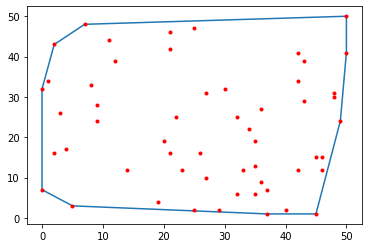

In [27]:
import math
i=0
j=0
k=0
l=0
infile=open('polyquery.txt', 'r')
cord = infile.read().split(' ')
cord = list(map(int, cord))
non_ext=[]
points=[tuple(cord[z: z + 2]) for z in range(0, len(cord), 2)]
#print(len(points))
for i in range (0,len(points)):
    Pi=Point(points[i])
    for j in range (0,len(points)):
        Pj=Point(points[j])
        for k in range (0,len(points)):
            if k==j or k==i:
                continue
            Pk=Point(points[k])
            Pl=Point(points[l])
            a=copy.deepcopy(Pi)
            b=copy.deepcopy(Pj)
            c=copy.deepcopy(Pk) 
            if dir(a,b,c)==0:
                    continue
            elif dir(a,b,c)==1:
                    continue
            else:
                    non_ext.append(points[i])
                    non_ext.append(points[j])
                
#print(non_ext)
import itertools
a=[]                                   
for i in itertools.product(points,points):
    if i[0]==i[1]:
        continue
    a.append(i)
b=[tuple(non_ext[z: z + 2]) for z in range(0, len(non_ext), 2)]
set1 = set(a)
set2 = set(b)
pp=list(set1.difference(set2))
print(pp)
pp=[item for t in pp for item in t]
#print (pp)
cent=(sum([p[0] for p in pp])/len(pp),sum([p[1] for p in pp])/len(pp))
# sort by polar angle
pp.sort(key=lambda p: math.atan2(p[1]-cent[1],p[0]-cent[0]))
print (pp)
convex_hull=copy.deepcopy(pp)
convex_hull.append(convex_hull[0])
xs, ys = zip(*convex_hull) #create lists of x and y values
plt.figure()
plt.plot(xs,ys)
for item in points:
    plt.plot([item[0]],[item[1]],marker='o', markersize=3, color="red")
plt.show()
